## <p style='text-align: center; font-family: "Times New Roman";'> TFIDF Adaboost Sentiment Classification Data-1 V2
 </p>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
import re
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pickle
import seaborn as sns
import time

In [2]:
colonnes= ['Target', 'ids', 'date', 'flag', 'user', 'text']
df = pd.read_csv('Datasets/Tweets.csv', encoding='ISO-8859-1', names=colonnes)

In [3]:
df.head()

,Target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
df= df[['Target', 'ids' ,'text']]
df

,Target,ids,text
0,0,1467810369,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,is upset that he can't update his Facebook by ...
2,0,1467810917,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,my whole body feels itchy and like its on fire
4,0,1467811193,"@nationwideclass no, it's not behaving at all...."
...,...,...,...
1599995,4,2193601966,Just woke up. Having no school is the best fee...
1599996,4,2193601969,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Happy 38th Birthday to my boo of alll time!!! ...


In [5]:
df.loc[df['Target']== 4, 'Target']=1
df.Target.unique()

array([0, 1], dtype=int64)

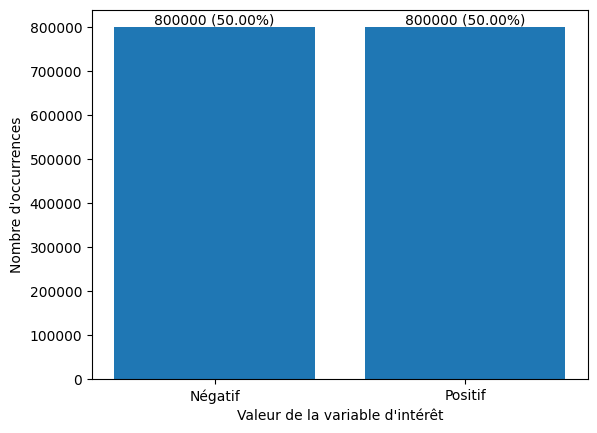

In [6]:
target_counts = df['Target'].value_counts()

# Calcul du proportion pour chaque valeur de la variable d'intérêt (Target)
target_proportions = df['Target'].value_counts(normalize=True)

# Création d'un graphique à barres pour visualiser la distribution
plt.bar(target_counts.index, target_counts.values)

# Ajoute des étiquettes des barres (nombre d'occurrences et proportion)
for i, count in enumerate(target_counts):
    proportion = target_proportions[i]
    plt.text(i, count, f"{count} ({proportion:.2%})", ha='center', va='bottom')

# Étiquetage de l'axe des x et y
plt.xlabel('Valeur de la variable d\'intérêt')
plt.ylabel('Nombre d\'occurrences')

# Ajoute d'une légende aux barres
plt.xticks(target_counts.index, ['Négatif', 'Positif'])

# Affichage du graphique
plt.show()

In [7]:
df["len"] = [len(text) for text in df["text"].values]

df.groupby("Target")["len"].mean()

Target
0    74.301790
1    73.878433
Name: len, dtype: float64

In [8]:
import re 
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [9]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
def clean_text(text):
    # Suppression des caractères spéciaux et de la ponctuation
    text = re.sub(r"[^\w\s]", "", text)
    
    # Conversion en minuscules
    text = text.lower()
    
    # Tokenisation du texte
    tokens = word_tokenize(text)
    
    # Suppression des mots vides
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Joindre les tokens en une seule chaîne
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text


# On appliquer le nettoyage du texte sur la colonne 'texte'
df['texte_nettoye'] = df['text'].apply(clean_text)

In [11]:
cleanText("Nowadays I am interested in learning nlp because it's interesting ")

NameError: name 'cleanText' is not defined

In [ ]:
# First, we need a vectorizer object
vectorizer = TfidfVectorizer(max_features=4000)
# This means just consider most used 4000 words

start = time.time()

x = vectorizer.fit_transform(text).toarray()

process_time = round(time.time()-start,2)

print("Vectorizing cleaned text using TF-IDF approach took {} seconds".format(process_time))

x.shape

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)